# Stage 3 - Create and Test Stage 1/Stage 2 
Using a python script to automate tests - Each one is randomized with the given input csv ('athlete_events_filtered.csv')

Student ID: 913391

Name: Akira Wang

Subject: COMP20002 Algorithms and Data Structures

Tutor: Grady Fitzpatrick (Thurs 9am)

In [98]:
# Import required libraries
import random
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
# Function to create randomly generated dictionary samples of different sizes to be inputted
# Also creates keys to be searched (including invalid ones) that are to be used as tests
def make():
    sizes = [int((0.02*i)*250000) for i in range(1,51)]
    # Number of simulations
    runs = [i for in range (1,6)]
    # CSV
    for i in sizes:
        for j in runs:
            outname = str(i) + "randv" + str(j)  + ".csv"
            lines = open('athlete_events_filtered.csv','r').readlines()
            # Randomize
            random.shuffle(lines)
            open(outname, 'w').writelines(lines[:size])
    # Keys
    for i in sizes:
        for j in runs:
            outname = str(i) + "randv" + str(j)  + ".csv"
            keyname = str(i) + "keysv" + str(j)  + ".txt"
            with open(outname,'r') as source:
                with open(keyname, "w") as target:
                    no = [random.randint(1,size) for i in range(1,51)]
                    for line in source:
                        if i in no:
                            target.write( line.split(',')[1] + '\n')
                    target.write("random1\n12345\nhehehe")

In [4]:
# Run tests and output results (stdout and output.txt)
def run(version):
    sets = []
    keys = []

    sizes = [int((0.02*i)*250000) for i in range(1,51)]
    runs = [i for in range (1,6)]

    for i in sizes:
        for j in runs:
            sets.append(str(i) + "randv" + str(j))
            keys.append(str(i) + "keysv" + str(j)  + ".txt")
    k = 0
    for s,k in zip(sets, keys):
        os.system(f"dict{version} {s}.csv dict{version}{s}results.txt < {k} > dict{version}{sets[k]}stdout.txt")
        k+=1

In [5]:
# Calculate the counts
def count(version):
    with open(f"dict{version}counts.csv", "w") as out:
        out.write("size,average\n")
        sizes = [int((0.02*i)*250000) for i in range(1,51)]
        runs = [i for in range (1,6)]
        
        for i in sizes:
            total = 0
            count = 0
            for j in runs:
                outname = "dict" + str(version) + str(size) + "randv" + str(i) + "stdout.txt"
                with open(outname, "r") as file:
                    for line in file:
                        count +=1
                        # Value of the number of comparisions of stdout
                        total+= int(line.split("-->")[1])
            out.write(f"{size},{total/count}\n")

In [ ]:
# Create files
make()

In [6]:
# Stage 1
def main1():
    run(1)
    count(1)
    return
if __name__ == "__main__":
    main1()

In [7]:
# Stage 2 (delete previous run ouputs)
def main2():
    run(2)
    count(2)
    return
if __name__ == "__main__":
    main()

# Stage 3 Analysis of Results
Using python visualization libraries

In [218]:
df1 = pd.read_csv('dict1counts.csv')
df2 = pd.read_csv('dict2counts.csv')
csv = pd.read_csv('athlete_events_filtered.csv')

In [219]:
df = df1.merge(df2,on='size')
df = df.rename({'size': 'Dictionary Input Size', 'average_x': 'Stage 1', 'average_y': 'Stage 2'},axis=1)

In [220]:
df

,Dictionary Input Size,Stage 1,Stage 2
0,5000,14.685039,14.625984
1,10000,16.142857,16.039683
2,15000,17.784314,17.623529
3,20000,18.266667,18.078431
4,25000,18.615686,18.376471
5,30000,18.517647,18.223529
6,35000,18.721569,18.403922
7,40000,19.321569,18.972549
8,45000,19.763780,19.354331
9,50000,20.031373,19.650980


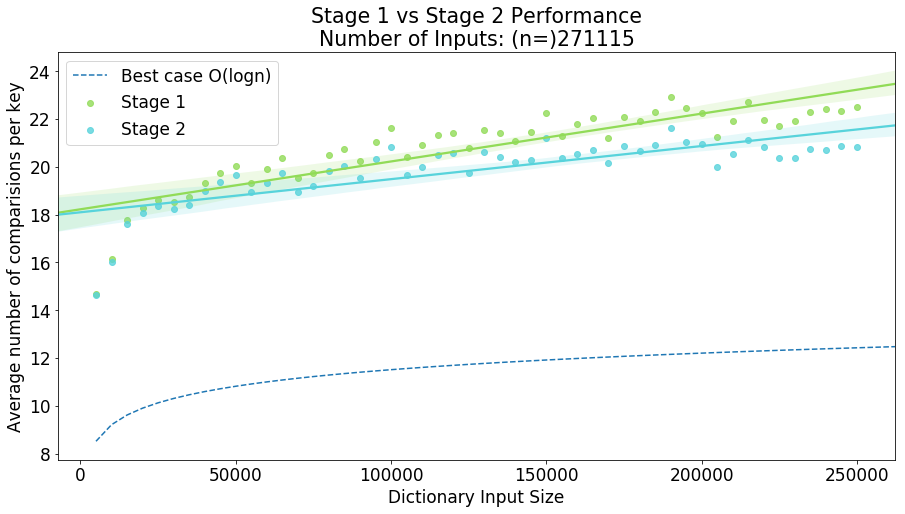

In [246]:
plt.clf()

plt.rcParams['figure.figsize'] = (15,7.5)
plt.rcParams.update({'font.size': 17})

colors = sns.color_palette("hls", 20)

sns.regplot('Dictionary Input Size', 'Stage 1', df, label='Stage 1', color=colors[5])
sns.regplot('Dictionary Input Size', 'Stage 2', df, label='Stage 2', color=colors[10])

# Input size of 5000 in increments of 5000 as tested above
x = range(5000,len(csv),5000)
y = np.log(x)
plt.plot(x, y, '--', label='Best case O(logn)')

plt.title('Stage 1 vs Stage 2 Performance\nNumber of Inputs: (n=)%d' % len(csv))
plt.ylabel('Average number of comparisions per key')

plt.legend()

plt.show()

In [274]:
time1 = open('time1_1.txt', 'r')
time2 = open('time1_2.txt', 'r')
time3 = open('time1_3.txt', 'r')
time4 = open('time2_1.txt', 'r')
time5 = open('time2_2.txt', 'r')
time6 = open('time2_3.txt', 'r')
keys = open('keyfile.txt', 'r')

In [275]:
times = defaultdict(list)
times['Stage 1'].append(time1.read().split(' ')[2][:-7])
times['Stage 1'].append(time2.read().split(' ')[2][:-7])
times['Stage 1'].append(time3.read().split(' ')[2][:-7])

times['Stage 2'].append(time4.read().split(' ')[2][:-7])
times['Stage 2'].append(time5.read().split(' ')[2][:-7])
times['Stage 2'].append(time6.read().split(' ')[2][:-7])

In [276]:
times = pd.DataFrame.from_dict(times)
times['Stage 1'] = times['Stage 1'].str.replace(':','')
times['Stage 2'] = times['Stage 2'].str.replace(':','')
times.index = ['normal', 'alternative', 'alternative2']
times = times.astype(float)
times.head()

,Stage 1,Stage 2
normal,2.47,2.06
alternative,2.18,1.93
alternative2,641.87,656.88


In [277]:
keys = keys.read().split('\n')

In [278]:
times['Best Case O(logn)'] = np.log(len(csv))

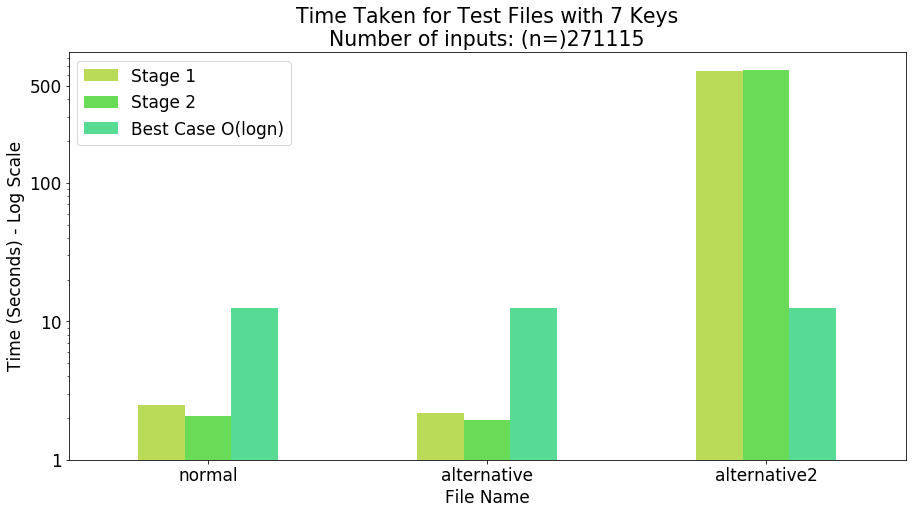

Keys to be searched:
A Dijiang
Zzimo Alves Calazans
randomperson
12345
Aquil Hashim Abdullah (Shumate-)
Genowefa Minicka (Cielik-)
Per Johan Daniel Wallner

Key: A Dijiang, is the first value in the csv
Key: Zzimo Alves Calazans, is the final value in the csv



In [279]:
colors=sns.color_palette("hls", 20)

times.plot.bar(color=[colors[4], colors[6], colors[8]])

plt.yscale('log')
plt.title("Time Taken for Test Files with %d Keys\nNumber of inputs: (n=)%d" % (len(keys),len(csv)))
plt.xlabel("File Name")
plt.xticks(rotation=0)
plt.yticks([1, 10, 100, 500], ['1', '10', '100', '500'])
plt.ylabel("Time (Seconds) - Log Scale")

plt.show()

print("Keys to be searched:")
for i in keys:
    print(i)

print("\nKey: %s, is the first value in the csv" % keys[0])
print("Key: %s, is the final value in the csv\n" % keys[1])